In [1]:
import pandas as pd
import numpy as np

%matplotlib inline 
# отображает графику в юпитере
%config IPCompleter.greedy=True 
# должно ускорять работу таба

import matplotlib.pyplot as plt
import seaborn as sns

from catboost import CatBoostRegressor, Pool
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_absolute_error, roc_curve, roc_auc_score

In [2]:
train = pd.read_csv('csgo.csv')
#test = pd.read_csv('test.csv')

In [6]:
train

,День,Месяц,Пик,Прошло_дней_пр,Пик.1,Счет_1_пр,Счет_2_пр,Прошло_дней_ка,Пик.2,Счет_1_ка,...,Соперник_ка_Wisla_Krakow,Соперник_ка_Wizards,Соперник_ка_Wygers,Соперник_ка_bezotca,Соперник_ка_c0ntact,Соперник_ка_ex-SMASH,Соперник_ка_forZe,Соперник_ка_lvlUP,Соперник_ка_selectah,Соперник_ка_x6tence
8,9,9,1,0,0,16,3,12,2,16,...,0,0,0,0,1,0,0,0,0,0
9,9,9,0,0,2,12,16,12,2,16,...,0,0,0,0,0,0,0,0,0,0
10,9,9,2,1,0,16,13,1,2,16,...,0,0,0,0,0,0,0,0,0,0
11,8,9,0,0,2,16,10,11,0,16,...,0,0,0,0,1,0,0,0,0,0
12,8,9,2,1,0,16,5,1,2,16,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,12,8,0,0,2,14,16,3,2,11,...,0,0,0,0,0,0,0,0,0,0
446,12,8,2,3,1,16,12,3,1,16,...,0,0,0,0,0,0,0,0,0,0
447,9,8,1,0,2,11,16,37,0,22,...,0,0,0,0,0,0,0,0,0,0
448,9,8,2,0,0,16,11,36,1,5,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 20 columns):
День              439 non-null int64
Месяц             439 non-null int64
Команда           439 non-null object
Соперник          439 non-null object
Карта             439 non-null object
Пик               439 non-null int64
Прошло_дней_пр    439 non-null int64
Соперник_пр       439 non-null object
Карта_пр          439 non-null object
Пик.1             439 non-null int64
Счет_1_пр         439 non-null int64
Счет_2_пр         439 non-null int64
Прошло_дней_ка    439 non-null int64
Соперник_ка       439 non-null object
Пик.2             439 non-null int64
Счет_1_ка         439 non-null int64
Счет_2_ка         439 non-null int64
Счет_1            439 non-null int64
Счет_2            439 non-null int64
Победа            439 non-null int64
dtypes: int64(14), object(6)
memory usage: 68.7+ KB


In [6]:
train.describe()

,День,Месяц,Пик,Прошло_дней_пр,Пик.1,Счет_1_пр,Счет_2_пр,Прошло_дней_ка,Пик.2,Счет_1_ка,Счет_2_ка,Счет_1,Счет_2,Победа
count,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000
mean,15.566434,7.988345,1.000000,1.212121,1.002331,14.303030,13.363636,7.445221,0.988345,14.051282,13.142191,14.055944,13.365967,0.547786
std,6.457871,0.107453,0.864675,4.743342,0.860610,6.397759,4.420976,12.310808,0.865947,4.025291,4.455472,4.055300,4.365204,0.498292
min,2.000000,7.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000
25%,10.000000,8.000000,0.000000,0.000000,0.000000,12.000000,10.000000,1.000000,0.000000,12.000000,10.000000,12.000000,10.000000,0.000000
50%,16.000000,8.000000,1.000000,0.000000,1.000000,16.000000,16.000000,3.000000,1.000000,16.000000,15.000000,16.000000,16.000000,1.000000
75%,20.000000,8.000000,2.000000,1.000000,2.000000,16.000000,16.000000,6.000000,2.000000,16.000000,16.000000,16.000000,16.000000,1.000000
max,31.000000,8.000000,2.000000,44.000000,2.000000,116.000000,29.000000,68.000000,2.000000,31.000000,29.000000,31.000000,29.000000,1.000000


In [5]:
train['Победа'].value_counts()

1    242
0    197
Name: Победа, dtype: int64

In [6]:
train['Карта'].value_counts()

nuke        86
inferno     80
dust2       75
overpass    55
mirage      54
train       54
vertigo     35
Name: Карта, dtype: int64

In [7]:
train['Соперник'].value_counts()

forZe             26
Team_K23          22
AVEZ              21
PACT              17
Galaxy_Racer      17
                  ..
Nexus              2
EndPoint           2
Ethereal           2
bezotca            1
Lyngby_Vikings     1
Name: Соперник, Length: 61, dtype: int64

In [10]:
train['Счет_2'].value_counts()

16    178
14     28
12     27
9      24
13     23
19     20
11     18
10     17
7      17
5      13
6      12
8      12
17      9
4       7
22      5
3       5
15      4
20      2
18      2
28      2
2       1
29      1
25      1
1       1
Name: Счет_2, dtype: int64

In [16]:
train.loc[train['Счет_1'] > 20]

,День,Месяц,Команда,Соперник,Карта,Пик,Прошло_дней_пр,Соперник_пр,Карта_пр,Пик.1,Счет_1_пр,Счет_2_пр,Прошло_дней_ка,Соперник_ка,Пик.2,Счет_1_ка,Счет_2_ка,Счет_1,Счет_2,Победа
142,9,8,Dignitas,AVEZ,vertigo,0,0,AVEZ,nuke,2,16,9,65,Vitality,1,11,16,22,20,1
157,10,8,lvlUP,KOVA,train,1,0,KOVA,nuke,0,4,16,0,Galaxy_Racer,2,19,22,23,25,0
169,7,8,lvlUP,Winstrike,nuke,1,9,CR4ZY,nuke,1,15,19,9,CR4ZY,1,15,19,31,29,1
172,30,7,lvlUP,CR4ZY,mirage,0,1,GamerLegion,mirage,1,11,16,1,GamerLegion,1,11,16,25,28,0
189,14,8,Nordavind,FATE,dust2,1,0,FATE,overpass,0,2,16,0,HONORIS,1,16,11,22,19,1
252,17,8,FATE,Izako_Boars,vertigo,0,0,Izako_Boars,train,2,13,16,3,Nordavind,0,5,16,22,20,1
265,24,8,SKADE,Team_K23,overpass,0,0,Team_K23,dust2,2,16,11,5,Izako_Boars,1,16,7,24,28,0
319,19,8,AGO,Sprout,mirage,1,0,Sprout,inferno,2,5,16,2,Sprout,0,16,7,22,18,1
395,20,8,HAVU,Sprout,vertigo,0,0,Sprout,nuke,2,10,16,9,AGO,0,9,16,22,19,1
400,16,8,HAVU,c0ntact,nuke,2,0,c0ntact,mirage,0,16,6,5,AGO,2,16,12,22,18,1


In [28]:
train.loc[train['Команда'] == 'AGO']

,День,Месяц,Команда,Соперник,Карта,Пик,Прошло_дней_пр,Соперник_пр,Карта_пр,Пик.1,Счет_1_пр,Счет_2_пр,Прошло_дней_ка,Соперник_ка,Пик.2,Счет_1_ка,Счет_2_ка,Счет_1,Счет_2,Победа
298,11,8,AGO,Budapest_Five,train,1,0,HAVU,mirage,1,16,7,37,ex-SMASH,1,16,6,17,19,0
299,11,8,AGO,HAVU,mirage,1,0,HAVU,vertigo,2,16,9,4,Galaxy_Racer,0,16,14,16,7,1
300,11,8,AGO,HAVU,vertigo,2,0,HAVU,nuke,0,12,16,4,Galaxy_Racer,2,16,9,16,9,1
301,11,8,AGO,HAVU,nuke,0,2,HONORIS,dust2,1,16,9,45,Lyngby_Vikings,1,12,16,12,16,0
302,9,8,AGO,HONORIS,dust2,1,2,Galaxy_Racer,vertigo,2,16,9,35,Nordavind,1,19,22,16,9,1
303,7,8,AGO,Galaxy_Racer,vertigo,2,0,Galaxy_Racer,mirage,0,16,14,33,Nordavind,2,16,5,16,9,1
304,7,8,AGO,Galaxy_Racer,mirage,0,1,Sprout,mirage,0,14,16,1,Sprout,0,14,16,16,14,1
305,6,8,AGO,Sprout,mirage,0,0,Sprout,inferno,2,11,16,32,Nordavind,0,11,16,14,16,0
306,6,8,AGO,Sprout,inferno,2,32,Nordavind,dust2,1,19,22,32,ex-SMASH,2,22,18,11,16,0


In [7]:
train[(train['Команда'] == 'AVEZ') & (train['Карта'] == 'mirage')]

,День,Месяц,Команда,Соперник,Карта,Пик,Прошло_дней_пр,Соперник_пр,Карта_пр,Пик.1,Счет_1_пр,Счет_2_пр,Прошло_дней_ка,Соперник_ка,Пик.2,Счет_1_ка,Счет_2_ка,Счет_1,Счет_2,Победа
0,28,8,AVEZ,c0ntact,mirage,0,0,c0ntact,overpass,2,16,11,45,Hard_Legion,0,3,16,16,4,1


In [5]:
x_graf = train.loc[train['Команда'] == 'forZe']

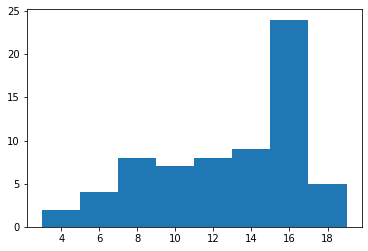

In [20]:
plt.hist(x_graf['Счет_2'],bins = 8)
plt.show()

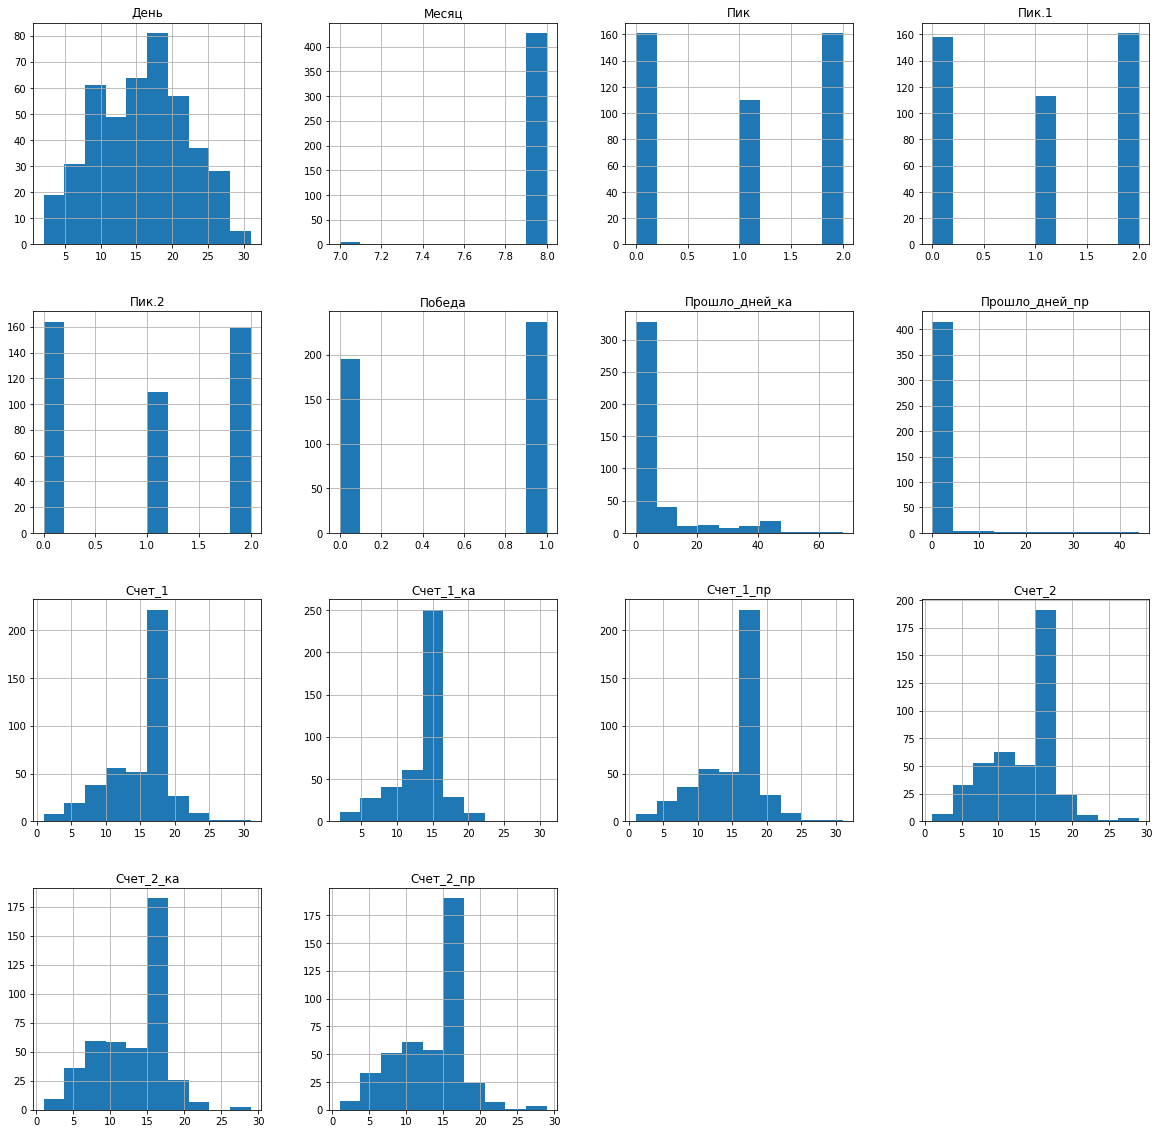

In [21]:
train.hist(train.columns, figsize=(20, 20));

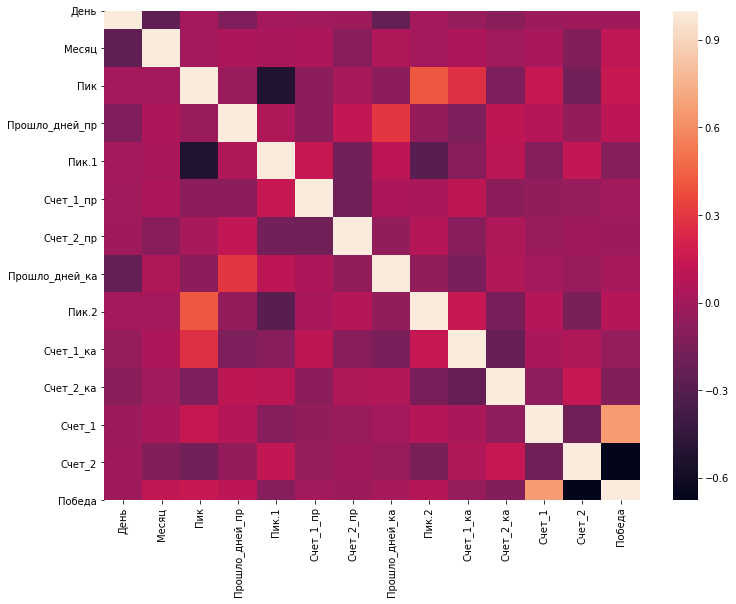

In [8]:
plt.figure(figsize=(12,9))
sns.heatmap(train.corr())

In [4]:
train = pd.get_dummies(train)

test = train[(train['День'] > 9) & (train['Месяц'] == 9)]
train = train[(train['День'] <= 9) | (train['Месяц'] != 9)]

In [5]:
test

,День,Месяц,Пик,Прошло_дней_пр,Пик.1,Счет_1_пр,Счет_2_пр,Прошло_дней_ка,Пик.2,Счет_1_ка,...,Соперник_ка_Wisla_Krakow,Соперник_ка_Wizards,Соперник_ка_Wygers,Соперник_ка_bezotca,Соперник_ка_c0ntact,Соперник_ка_ex-SMASH,Соперник_ка_forZe,Соперник_ка_lvlUP,Соперник_ка_selectah,Соперник_ка_x6tence
0,15,9,1,1,2,7,16,8,0,16,...,0,0,0,0,0,0,0,0,0,0
1,14,9,2,0,0,12,16,3,0,16,...,0,0,0,0,0,0,0,0,0,0
2,14,9,0,3,0,16,13,4,0,7,...,1,0,0,0,0,0,0,0,0,0
3,11,9,0,0,2,16,7,1,2,16,...,1,0,0,0,0,0,0,0,0,0
4,11,9,2,1,1,10,16,2,1,17,...,0,0,0,0,0,0,0,0,0,0
5,10,9,1,0,0,7,16,22,0,1,...,0,0,0,0,0,0,0,0,0,0
6,10,9,0,0,2,16,13,2,0,16,...,0,0,0,0,0,0,0,0,0,0
7,10,9,2,1,1,17,19,1,2,12,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y1 = train[train.columns[11]]
y2 = train[train.columns[12]]
i = train[train.columns[13]]
x = train.drop(train.columns[11:14], axis = 1)

ot1 = test[test.columns[11]]
ot2 = test[test.columns[12]]
ot = test[test.columns[13]]
test = test.drop(test.columns[11:14], axis = 1)

In [21]:
params = \
{ 
'learning_rate': 0.07521709965938336,

'iterations':7, 
'task_type':'GPU',
'gpu_ram_part':0.8,
'l2_leaf_reg':0.2,
'random_strength':6,
#'loss_function':'LogLinQuantile',
'loss_function':'RMSE',
'random_seed':500,
'depth':7
}

model1 = CatBoostRegressor(**params)
model1.fit(x, y1)

model2 = CatBoostRegressor(**params)
model2.fit(x, y2)

modeli = CatBoostRegressor(**params)
modeli.fit(x, i)

0:	learn: 4.0004336	total: 8.73ms	remaining: 52.4ms
1:	learn: 3.9730599	total: 15.1ms	remaining: 37.9ms
2:	learn: 3.9650440	total: 19.8ms	remaining: 26.5ms
3:	learn: 3.9266686	total: 24.7ms	remaining: 18.5ms
4:	learn: 3.9054470	total: 29.4ms	remaining: 11.8ms
5:	learn: 3.8775206	total: 34.2ms	remaining: 5.7ms
6:	learn: 3.8609423	total: 39ms	remaining: 0us
0:	learn: 4.3988643	total: 7.65ms	remaining: 45.9ms
1:	learn: 4.3555863	total: 12.7ms	remaining: 31.8ms
2:	learn: 4.3430740	total: 18.3ms	remaining: 24.4ms
3:	learn: 4.3163236	total: 23.4ms	remaining: 17.5ms
4:	learn: 4.2848347	total: 28.4ms	remaining: 11.4ms
5:	learn: 4.2590324	total: 34.5ms	remaining: 5.76ms
6:	learn: 4.2456593	total: 39.4ms	remaining: 0us
0:	learn: 0.4957202	total: 8.76ms	remaining: 52.6ms
1:	learn: 0.4932650	total: 13.4ms	remaining: 33.6ms
2:	learn: 0.4928484	total: 18.1ms	remaining: 24.2ms
3:	learn: 0.4901559	total: 22.9ms	remaining: 17.2ms
4:	learn: 0.4884877	total: 27.7ms	remaining: 11.1ms
5:	learn: 0.4861369	t

In [31]:
y1 = train[train.columns[17]]
y2 = train[train.columns[18]]
i = train[train.columns[19]]
x = train.drop(train.columns[17:20], axis = 1)

cat_features = list([2,3,4,5,7,8,9,13,14])
# какие фичи категориальные

ot1 = test[test.columns[17]]
ot2 = test[test.columns[18]]
ot = test[test.columns[19]]
test = test.drop(test.columns[17:20], axis = 1)

In [13]:
params = \
{ 
'learning_rate': 0.07521709965938336,

'iterations':7, 
'task_type':'GPU',
'gpu_ram_part':0.8,
'l2_leaf_reg':0.2,
'random_strength':6,
#'loss_function':'LogLinQuantile',
'loss_function':'RMSE',
'random_seed':500,
'depth':7
}

In [14]:
model1 = CatBoostRegressor(**params)
model1.fit(x, y1, cat_features=cat_features)

model2 = CatBoostRegressor(**params)
model2.fit(x, y2, cat_features=cat_features)

modeli = CatBoostRegressor(**params)
modeli.fit(x, i, cat_features=cat_features)

NameError: name 'cat_features' is not defined

In [13]:
model1.predict(test)
#счет команды

array([13.48579899, 13.94377901])

In [12]:
model2.predict(test)
#счет соперника

array([12.62668368, 13.22348831])

In [16]:
modeli.predict(test)
#вероятность победы

array([-0.01452184, -0.04641089])

In [27]:
modeli.predict(test)
#вероятность победы

array([-0.06309836, -0.03703115])

In [96]:
modeli.predict(test)
#вероятность победы

array([0.51614913, 0.55110904, 0.59290887, 0.55870319, 0.54033455,
       0.55110904, 0.55870319, 0.54033455, 0.55870319, 0.54307035,
       0.54420271, 0.54505697, 0.60235558, 0.53369522, 0.55439123,
       0.53531369, 0.55886254, 0.56667737, 0.5889341 , 0.56871869,
       0.50853123, 0.57397009, 0.54420271, 0.60050302, 0.54991893,
       0.59010252, 0.59476144, 0.56749106, 0.54033455, 0.56957295,
       0.51564963, 0.55110904, 0.54033455, 0.55110904, 0.59290887,
       0.5941624 , 0.5811806 , 0.60235558, 0.57840681, 0.57860012,
       0.54505697, 0.55179685, 0.54020598, 0.52380468, 0.52536604,
       0.54574479, 0.53342822, 0.59010252, 0.55217537, 0.58213438,
       0.52908601, 0.56749106, 0.53330119, 0.54505697, 0.54773502,
       0.55179685, 0.54912242, 0.56828756, 0.54033455, 0.59290887,
       0.55464135, 0.62134129, 0.55870319, 0.54100249, 0.59696875,
       0.57932804, 0.53815064, 0.55179685, 0.54033455, 0.58656826,
       0.51937891, 0.60183154, 0.5449747 , 0.54799569, 0.55558

In [40]:
mean_absolute_error(ot1, model1.predict(test))

3.306766068750294

In [41]:
mean_absolute_error(ot2, model2.predict(test))

3.367192869000137

In [34]:
mean_absolute_error(ot, modeli.predict(test))
#LogLinQuantile

0.5566647174959042

In [97]:
mean_absolute_error(ot, modeli.predict(test))
#RMSE

0.49798616072308505

Train roc-auc: 0.7723597410922928
Test roc-auc: 0.33333333333333326


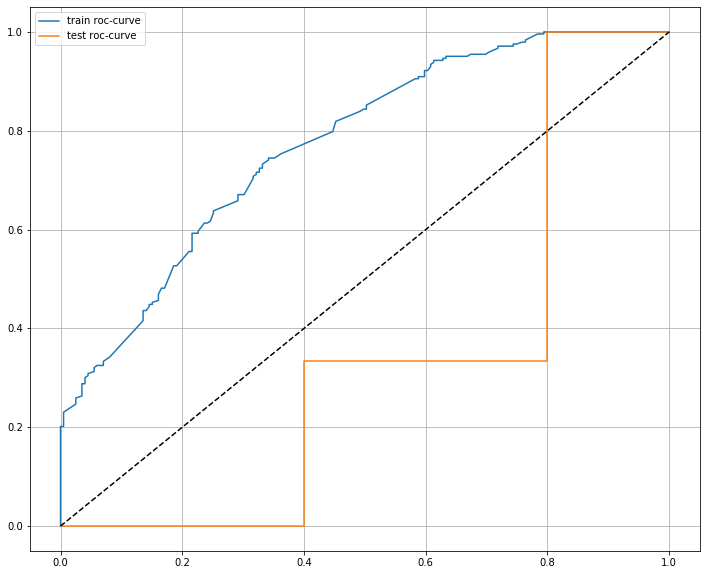

In [22]:

plt.figure(figsize=(12,10))

print(f'Train roc-auc: {roc_auc_score(i, modeli.predict(x))}')
print(f'Test roc-auc: {roc_auc_score(ot, modeli.predict(test))}')


plt.plot(*roc_curve(i, modeli.predict(x))[:2], label='train roc-curve')
plt.plot(*roc_curve(ot, modeli.predict(test))[:2], label='test roc-curve')

plt.plot([0,1], [0,1], linestyle='--', color='black')
plt.grid(True)
plt.legend()
plt.show()

Train roc-auc: 0.7723597410922928
Test roc-auc: 0.33333333333333326


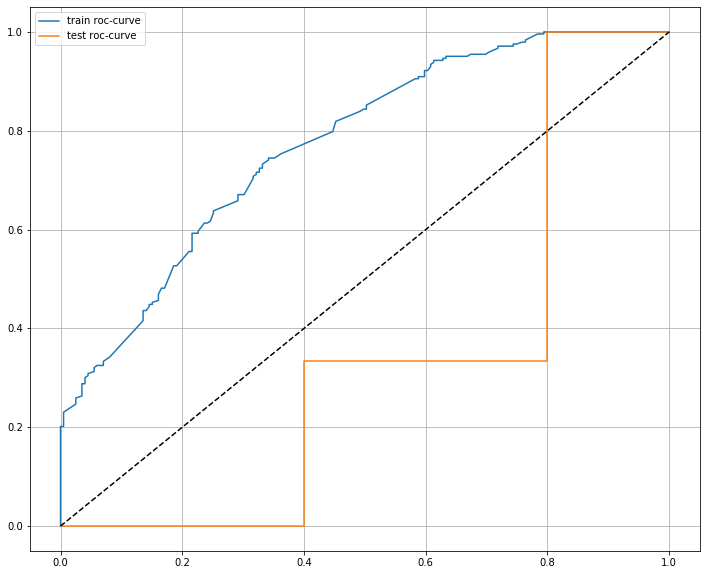

In [23]:
plt.figure(figsize=(12,10))

print(f'Train roc-auc: {roc_auc_score(i, modeli.predict(x))}')
print(f'Test roc-auc: {roc_auc_score(ot, modeli.predict(test))}')


plt.plot(*roc_curve(i, modeli.predict(x))[:2], label='train roc-curve')
plt.plot(*roc_curve(ot, modeli.predict(test))[:2], label='test roc-curve')

plt.plot([0,1], [0,1], linestyle='--', color='black')
plt.grid(True)
plt.legend()
plt.show()

In [9]:
ml = LogisticRegression().fit(x, i)

C:\Users\ALEX\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train roc-auc: 0.8112888398602683
Test roc-auc: 0.4983974358974359


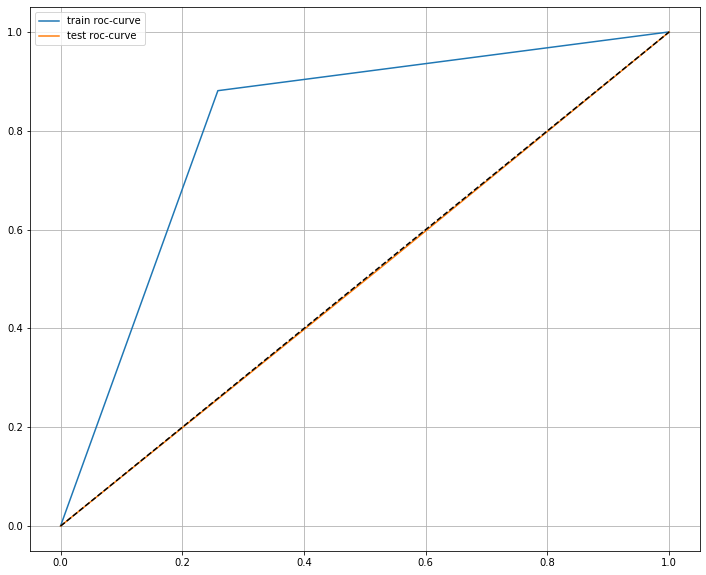

In [10]:
plt.figure(figsize=(12,10))

print(f'Train roc-auc: {roc_auc_score(i, ml.predict(x))}')
print(f'Test roc-auc: {roc_auc_score(ot, ml.predict(test))}')


plt.plot(*roc_curve(i, ml.predict(x))[:2], label='train roc-curve')
plt.plot(*roc_curve(ot, ml.predict(test))[:2], label='test roc-curve')

plt.plot([0,1], [0,1], linestyle='--', color='black')
plt.grid(True)
plt.legend()
plt.show()

In [18]:
mlp = MLPRegressor(random_state= 3, max_iter= 45).fit(x, i)

C:\Users\ALEX\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (45) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Train roc-auc: 0.971917199164547
Test roc-auc: 0.3333333333333333


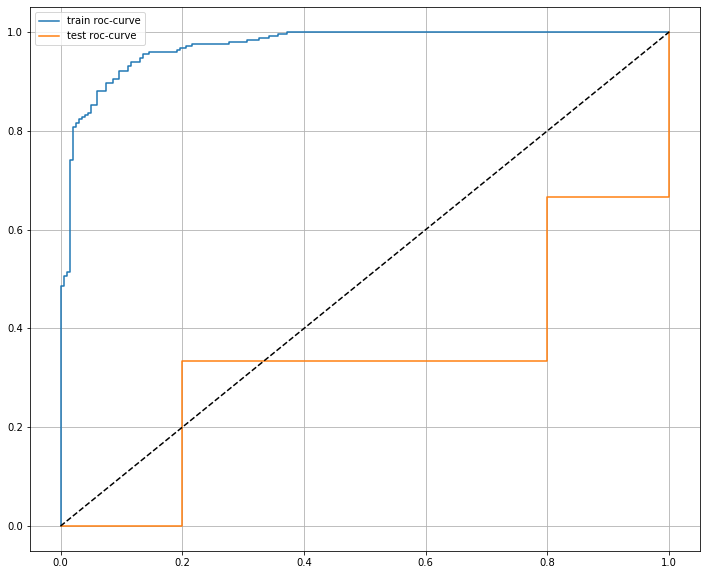

In [19]:
plt.figure(figsize=(12,10))

print(f'Train roc-auc: {roc_auc_score(i, mlp.predict(x))}')
print(f'Test roc-auc: {roc_auc_score(ot, mlp.predict(test))}')


plt.plot(*roc_curve(i, mlp.predict(x))[:2], label='train roc-curve')
plt.plot(*roc_curve(ot, mlp.predict(test))[:2], label='test roc-curve')

plt.plot([0,1], [0,1], linestyle='--', color='black')
plt.grid(True)
plt.legend()
plt.show()

In [20]:
mean_absolute_error(ot, mlp.predict(test))
#RMSE

0.6355304894532399

In [10]:
mlp.predict(test)
#вероятность победы

array([ 0.817254  ,  0.31097012,  0.79929692,  0.77824375, -0.28861237,
        0.81261175,  0.34327038,  0.15217266, -0.4828257 ,  0.51452675,
        0.72935799,  0.3489012 ,  1.63994501,  1.02155048,  1.01542525])

# Не учитывая дату

In [13]:
train = train.drop(train.columns[0:2], axis = 1)
test = test.drop(test.columns[0:2], axis = 1)

y1 = train[train.columns[15]]
y2 = train[train.columns[16]]
i = train[train.columns[17]]
x = train.drop(train.columns[15:18], axis = 1)

cat_features = list([0,1,2,3,5,6,7,11,12])
# какие фичи категориальные

ot1 = test[test.columns[15]]
ot2 = test[test.columns[16]]
ot = test[test.columns[17]]
test = test.drop(test.columns[15:18], axis = 1)

In [48]:
model1.predict(test)
#счет команды

array([13.4170484, 13.3956374])

In [49]:
model2.predict(test)
#счет соперника

array([13.81119538, 12.43646202])

In [50]:
modeli.predict(test)
#вероятность победы

array([0.37964641, 0.4233763 ])

In [9]:
y_train = train[train.columns[17:20]]
x = train.drop(train.columns[17:20], axis = 1)

In [12]:
grid_mlp = MLPRegressor(random_state= 2,  max_iter= 100)

In [13]:
%%time
grid_mlp.fit(x, y_train)

ValueError: could not convert string to float: 'AVEZ'